<a href="https://colab.research.google.com/github/Tobifads/Warehousing-CW/blob/main/Copy_of_Untitled51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/collar sta/bank_transactions.csv')
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [ ]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [ ]:
df.describe(include='object')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,TransactionDate
count,1048567,1048567,1045170,1047467,1048416,1048567
unique,1048567,884265,17254,3,9355,55
top,T1048567,C3226689,1/1/1800,M,MUMBAI,7/8/16
freq,1,6,57339,765530,103595,27261


In [ ]:
na_counts = df.isna().sum()
total_rows = len(df)
na_percentage = (na_counts / total_rows) * 100
print(na_percentage)

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64


In [ ]:
rows_with_na = df[df.isna().any(axis=1)]
num_rows_with_na = len(rows_with_na)
total_rows = len(df)
percentage_rows_with_na = (num_rows_with_na / total_rows) * 100
print(f"Percentage of rows with at least one NA value: {percentage_rows_with_na:.2f}%")

Percentage of rows with at least one NA value: 0.66%


In [ ]:
na_counts

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [ ]:
df_1 = df.dropna()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


In [ ]:
df_1['CustomerDOB'] = pd.to_datetime(df_1['CustomerDOB'], errors='coerce')
df_1.head()

<ipython-input-14-517dae08bfcb>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_1['CustomerDOB'] = pd.to_datetime(df_1['CustomerDOB'], errors='coerce')
<ipython-input-14-517dae08bfcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['CustomerDOB'] = pd.to_datetime(df_1['CustomerDOB'], errors='coerce')


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [ ]:
df_1['TransactionDate'] = pd.to_datetime(df_1['TransactionDate'], errors='coerce')
df_1.head()

<ipython-input-15-b3ed1263738e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_1['TransactionDate'] = pd.to_datetime(df_1['TransactionDate'], errors='coerce')
<ipython-input-15-b3ed1263738e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['TransactionDate'] = pd.to_datetime(df_1['TransactionDate'], errors='coerce')


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


In [ ]:
# Calculate age at the time of the transaction
df_1['AgeAtTransaction'] = (df_1['TransactionDate'] - df_1['CustomerDOB']).dt.days / 365.25

# Adjust CustomerDOB for ages less than 10 or negative
df_1.loc[(df_1['AgeAtTransaction'] < 10) | (df_1['AgeAtTransaction'] < 0), 'CustomerDOB'] = df_1['CustomerDOB'] - pd.DateOffset(years=100)

# Recalculate AgeAtTransaction after adjustment
df_1['AgeAtTransaction'] = (df_1['TransactionDate'] - df_1['CustomerDOB']).dt.days / 365.25

# Remove rows with negative AgeAtTransaction
df_1 = df_1[df_1['AgeAtTransaction'] >= 0]

# Display the updated DataFrame
df_1.head()

<ipython-input-16-1deb0e668689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['AgeAtTransaction'] = (df_1['TransactionDate'] - df_1['CustomerDOB']).dt.days / 365.25
<ipython-input-16-1deb0e668689>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['AgeAtTransaction'] = (df_1['TransactionDate'] - df_1['CustomerDOB']).dt.days / 365.25


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),AgeAtTransaction
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,21.355236
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,58.847365
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,19.200548
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,42.401095
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,27.876797


In [ ]:
df_1['TransactionTime'] = df_1['TransactionTime'].astype(str).str.zfill(6)
df_1['TransactionTime'] = pd.to_datetime(df_1['TransactionTime'],format='%H%M%S').dt.strftime('%H:%M:%S')

In [ ]:
df_1['TransactionTime'].head()

,TransactionTime
0,14:32:07
1,14:18:58
2,14:27:12
3,14:27:14
4,18:11:56


In [ ]:
older_than_100 = df_1[df_1['AgeAtTransaction'] > 100]
older_than_100

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),AgeAtTransaction
16,T17,C1376215,1800-01-01,M,MUMBAI,77495.15,2016-01-08,12:47:27,1423.11,216.013689
22,T23,C7018081,1800-01-01,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,10:47:18,110.00,216.177960
28,T29,C7935438,1800-01-01,M,MOHALI,969436.12,2016-03-08,18:36:34,36.90,216.177960
35,T36,C1211387,1800-01-01,M,AHMEDABAD,11791.25,2016-03-08,12:59:15,1075.00,216.177960
151,T152,C3334638,1800-01-01,M,PUNE,700.00,2016-09-08,02:49:12,1500.00,216.681725
...,...,...,...,...,...,...,...,...,...,...
1048443,T1048444,C7261226,1800-01-01,M,BHILAI,1393.33,2016-09-18,10:24:27,200.00,216.709103
1048452,T1048453,C3813481,1800-01-01,M,NEW DELHI,984605.24,2016-09-18,08:46:44,219.00,216.709103
1048531,T1048532,C6937679,1800-01-01,M,NEW DELHI,50698.90,2016-09-18,18:43:19,598.86,216.709103
1048533,T1048534,C7431884,1800-01-01,M,MANDIR DHANBAD,53771.64,2016-09-18,18:40:49,520.00,216.709103


In [ ]:
dob_stats = older_than_100['CustomerDOB'].describe()
print(dob_stats)


count                            56481
mean     1800-05-16 17:16:00.089234432
min                1800-01-01 00:00:00
25%                1800-01-01 00:00:00
50%                1800-01-01 00:00:00
75%                1800-01-01 00:00:00
max                1916-02-22 00:00:00
Name: CustomerDOB, dtype: object


In [ ]:
df_2 = df_1[df_1['CustomerDOB']!= '1800-01-01']
df_2

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),AgeAtTransaction
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,21.355236
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,58.847365
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,19.200548
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,42.401095
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,27.876797
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,26.124572
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,24.577687
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,27.337440
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,38.053388


In [ ]:
df_2.describe(include='object')

,TransactionID,CustomerID,CustGender,CustLocation,TransactionTime
count,985322,985322,985322,985322,985322
unique,985322,839081,2,8164,81394
top,T1048567,C1736254,M,MUMBAI,19:33:03
freq,1,6,712454,97679,46


In [ ]:
df_2 = df_2[df_2['TransactionAmount (INR)'] > 0]

In [ ]:
df_2.shape

(984614, 10)

In [ ]:
df_2.describe(include='object')

,TransactionID,CustomerID,CustGender,CustLocation,TransactionTime
count,984614,984614,984614,984614,984614
unique,984614,838561,2,8161,81343
top,T1048567,C6222360,M,MUMBAI,19:33:03
freq,1,6,711885,97605,46


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984614 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            984614 non-null  object        
 1   CustomerID               984614 non-null  object        
 2   CustomerDOB              984614 non-null  datetime64[ns]
 3   CustGender               984614 non-null  object        
 4   CustLocation             984614 non-null  object        
 5   CustAccountBalance       984614 non-null  float64       
 6   TransactionDate          984614 non-null  datetime64[ns]
 7   TransactionTime          984614 non-null  object        
 8   TransactionAmount (INR)  984614 non-null  float64       
 9   AgeAtTransaction         984614 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 82.6+ MB


In [ ]:
print(df_2['CustGender'].unique())

['F' 'M']


In [ ]:
df_2

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),AgeAtTransaction
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,21.355236
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,58.847365
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,19.200548
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,42.401095
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,27.876797
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,26.124572
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,24.577687
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,27.337440
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,38.053388


In [ ]:
df_3 = df_2

In [ ]:
df_3.shape

(984614, 10)

In [ ]:
grouped_df = df_3.groupby(['CustomerID', 'CustomerDOB', 'CustGender']).size().reset_index(name='Count')

In [ ]:
print(grouped_df)

       CustomerID CustomerDOB CustGender  Count
0        C1010011  1983-05-08          M      1
1        C1010011  1992-08-19          F      1
2        C1010012  1994-07-28          M      1
3        C1010014  1984-08-19          M      1
4        C1010014  1992-04-06          F      1
...           ...         ...        ...    ...
983396   C9099836  1990-12-24          M      1
983397   C9099877  1996-09-06          M      1
983398   C9099919  1993-10-21          M      1
983399   C9099941  1995-04-22          M      1
983400   C9099956  1982-11-09          M      1

[983401 rows x 4 columns]


In [ ]:
grouped_df.describe()

,CustomerDOB,Count
count,983401,983401.000000
mean,1985-06-10 18:26:38.868416768,1.001233
min,1906-06-24 00:00:00,1.000000
25%,1982-01-29 00:00:00,1.000000
50%,1987-09-14 00:00:00,1.000000
75%,1991-05-06 00:00:00,1.000000
max,2006-07-19 00:00:00,3.000000
std,NaN,0.035215


In [ ]:
# Sort (if needed) and reset index
grouped_df = grouped_df.sort_values(by=['CustomerID', 'Count']).reset_index(drop=True)

# Assign CustomerCode like C001, C002, ...
grouped_df['CustomerCode'] = grouped_df.index + 1
grouped_df['CustomerCode'] = grouped_df['CustomerCode'].apply(lambda x: f'C{x:03d}')

In [ ]:
df_3 = df_3.merge(
    grouped_df[['CustomerID', 'CustomerDOB', 'CustGender', 'CustomerCode']],
    on=['CustomerID', 'CustomerDOB', 'CustGender'],
    how='left'
)

# Optionally rename
df_3.rename(columns={'CustomerCode': 'UniqueIdentifier'}, inplace=True)


In [ ]:
df_3.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),AgeAtTransaction,UniqueIdentifier
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,21.355236,C591637
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,58.847365,C143620
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,19.200548,C414668
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,42.401095,C531650
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,27.876797,C978006


In [ ]:
df_3.shape

(984614, 11)

In [ ]:
df_3['CustomerID'].describe()

,CustomerID
count,984614
unique,838561
top,C6222360
freq,6


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984614 entries, 0 to 984613
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            984614 non-null  object        
 1   CustomerID               984614 non-null  object        
 2   CustomerDOB              984614 non-null  datetime64[ns]
 3   CustGender               984614 non-null  object        
 4   CustLocation             984614 non-null  object        
 5   CustAccountBalance       984614 non-null  float64       
 6   TransactionDate          984614 non-null  datetime64[ns]
 7   TransactionTime          984614 non-null  object        
 8   TransactionAmount (INR)  984614 non-null  float64       
 9   AgeAtTransaction         984614 non-null  float64       
 10  UniqueIdentifier         984614 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 82.6+ MB


In [ ]:
location_counts = df_3['CustLocation'].value_counts()
location_counts.head()

,count
CustLocation,
MUMBAI,97605
BANGALORE,77688
NEW DELHI,76307
GURGAON,70447
DELHI,67263


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_rows', 50)
import warnings
import plotly.express as px
from datetime import datetime, date
warnings.filterwarnings("ignore")


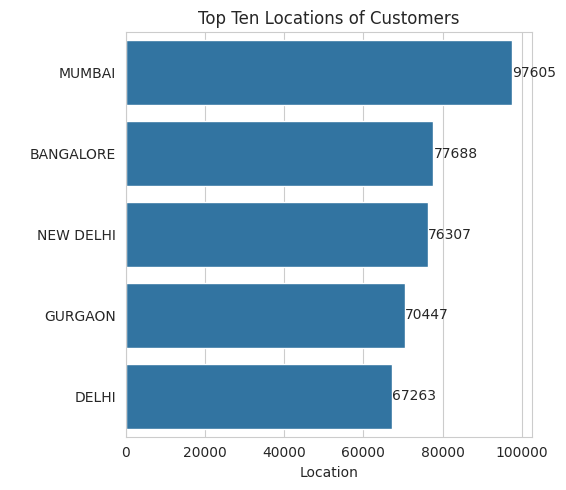

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (10,5))
ax2 = fig.add_subplot(1,2,2)
loc_10 = df_3['CustLocation'].value_counts().to_frame().head(5).reset_index()
loc_10.columns = ['CustLocation', 'count']
ax2 = sns.barplot(data = loc_10 , x = 'count' , y = 'CustLocation' )
ax2.set_title('Top Ten Locations of Customers')
ax2.bar_label(ax2.containers[0])
ax2.set_ylabel(' ')
ax2.set_xlabel('Location')
plt.tight_layout()

In [ ]:
#RFM values per Customer
import pandas as pd
from datetime import datetime, timedelta


# Ensure TransactionDate is in datetime format
df_3['TransactionDate'] = pd.to_datetime(df_3['TransactionDate'])

# Set the reference date (e.g., today's date or max transaction date in the dataset)
reference_date = df_3['TransactionDate'].max() + timedelta(days=1)

# Group by CustomerID to calculate RFM values
rfm = df_3.groupby('CustomerID').agg(
    Recency=('TransactionDate', lambda x: (reference_date - x.max()).days),  # Days since last purchase
    Frequency=('TransactionDate', 'count'),  # Number of transactions
    Monetary=('TransactionAmount (INR)', 'sum')  # Total spending
).reset_index()

# Sort by Recency (most recent customers first)
rfm = rfm.sort_values(by='Recency', ascending=True)

print(rfm.head(10))


       CustomerID  Recency  Frequency  Monetary
426127   C5117513        1          2    100.00
426114   C5117471        1          1     50.00
314451   C4025060        1          2   3200.49
87364    C1827729        1          2   2238.98
490554   C5726365        1          1     50.00
490574   C5726459        1          1   3133.00
838445   C9096576        1          1    222.00
80       C1010311        1          1    426.70
800786   C8724253        1          1    131.00
248844   C3411885        1          2    636.00


In [ ]:
# calculate Recency

# Compute the maximum date to know the last transaction date
max_date = max(df_3['TransactionDate'])
# Compute the difference between max date and transaction date
df_3['difference'] = (max_date - df_2['TransactionDate']).dt.days
# Compute last transaction date to get the recency of customers
rfm_r = df_3.groupby('CustomerID')['difference'].min()
rfm_r = rfm_r.reset_index()
rfm_r.head()

,CustomerID,difference
0,C1010011,74.0
1,C1010012,116.0
2,C1010014,154.0
3,C1010018,0.0
4,C1010024,118.0


In [ ]:
# Filter the DataFrame to select rows with the specified UniqueIdentifier
customer_details = df_3[df_3['CustomerID'] == 'C5117513']

# Display the details
print(customer_details)

       TransactionID CustomerID CustomerDOB CustGender CustLocation  \
87021         T93297   C5117513  1995-11-30          M        DELHI   
861672       T918184   C5117513  1992-06-15          M     SILIGURI   

        CustAccountBalance TransactionDate TransactionTime  \
87021              7103.78      2016-09-22        15:50:16   
861672             6214.72      2016-12-09        21:27:18   

        TransactionAmount (INR)  AgeAtTransaction UniqueIdentifier  difference  
87021                      50.0         20.813142          C499631       336.0  
861672                     50.0         24.484600          C499630       122.0  


In [ ]:
# Get the maximum transaction date
max_transaction_date = df_3['TransactionDate'].max()

# Filter the DataFrame for customer "C1010018"
customer_transactions = df_3[df_3['CustomerID'] == 'C1010018']

# Get the transaction date for customer "C1010018"
customer_transaction_date = customer_transactions['TransactionDate'].iloc[0]

# Calculate the difference
time_difference = max_transaction_date - customer_transaction_date

# Display the result
print(time_difference)

85 days 00:00:00


In [ ]:
rfm_r.describe()

,difference
count,794781.000000
mean,132.837418
std,82.124654
min,0.000000
25%,92.000000
50%,111.000000
75%,154.000000
max,336.000000


In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,838561.000000,838561.000000,8.385610e+05
mean,130.307472,1.174171,1.706622e+03
std,80.256728,0.434989,6.689594e+03
min,1.000000,1.000000,1.000000e-02
25%,87.000000,1.000000,1.990000e+02
50%,110.000000,1.000000,5.000000e+02
75%,155.000000,1.000000,1.420000e+03
max,337.000000,6.000000,1.560035e+06


In [ ]:
# Count rows with Recency equal to 0
zero_recency_count = (rfm['Recency'] == 0).sum()

# Display the count
print(f"Number of rows with Recency equal to 0: {zero_recency_count}")

Number of rows with Recency equal to 0: 0


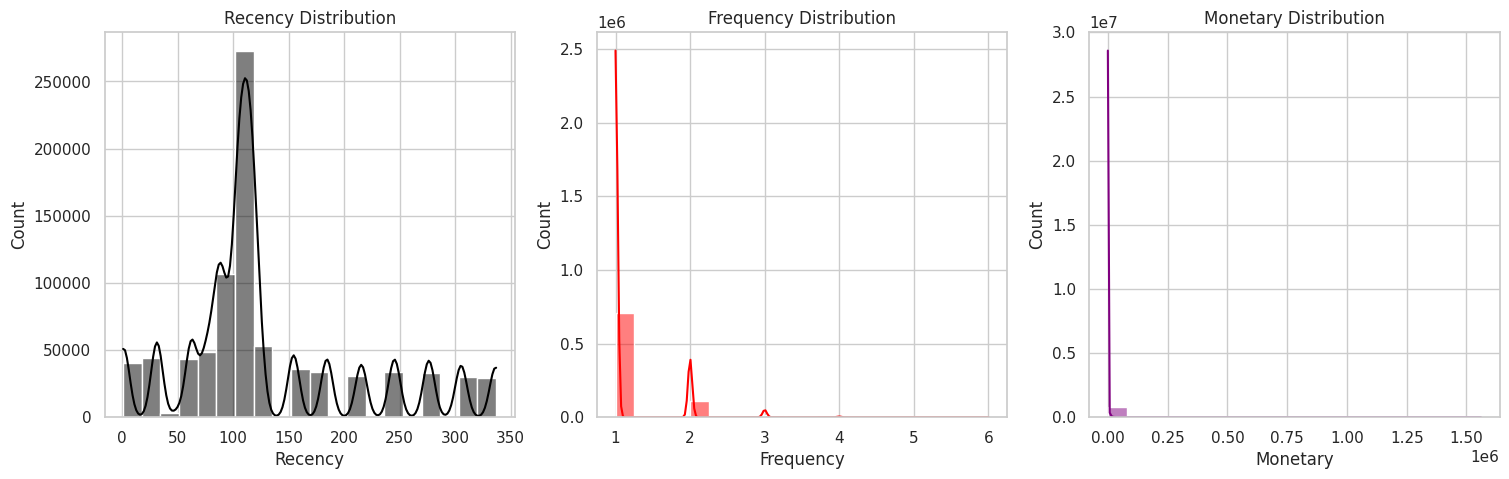

In [ ]:
sns.set(style="whitegrid")

# Create subplots for Recency, Frequency, and Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency Distribution
sns.histplot(rfm['Recency'], bins=20, kde=True, ax=axes[0], color='black')
axes[0].set_title('Recency Distribution')

# Frequency Distribution
sns.histplot(rfm['Frequency'], bins=20, kde=True, ax=axes[1], color='red')
axes[1].set_title('Frequency Distribution')

# Monetary Distribution
sns.histplot(rfm['Monetary'], bins=20, kde=True, ax=axes[2], color='purple')
axes[2].set_title('Monetary Distribution')

# Show the plots
plt.show()

In [ ]:
from scipy import stats
import numpy as np


# Apply Box-Cox transformation
customers_fix = pd.DataFrame()
customers_fix["Recency"] = stats.boxcox(rfm['Recency'])[0]
customers_fix["Frequency"] = stats.boxcox(rfm['Frequency'])[0]
customers_fix["MonetaryValue"] = stats.boxcox(rfm['Monetary'])[0] # Update 'MonetaryValue' to 'Monetary'

customers_fix.tail()

,Recency,Frequency,MonetaryValue
838556,45.89442,0.0,11.411832
838557,45.89442,0.0,3.013654
838558,45.89442,0.0,8.603162
838559,45.89442,0.0,5.116945
838560,45.89442,0.0,7.616802


In [ ]:
import numpy as np
import pandas as pd

# Apply log1p transformation
customers_fix = pd.DataFrame()
customers_fix["Recency"] = np.log1p(rfm['Recency'])
customers_fix["Frequency"] = np.log1p(rfm['Frequency'])
customers_fix["MonetaryValue"] = np.log1p(rfm['Monetary'])

customers_fix.tail()

,Recency,Frequency,MonetaryValue
662005,5.823046,0.693147,9.210440
285759,5.823046,0.693147,2.883683
412434,5.823046,0.693147,7.273093
838494,5.823046,0.693147,4.615121
662099,5.823046,0.693147,6.551080


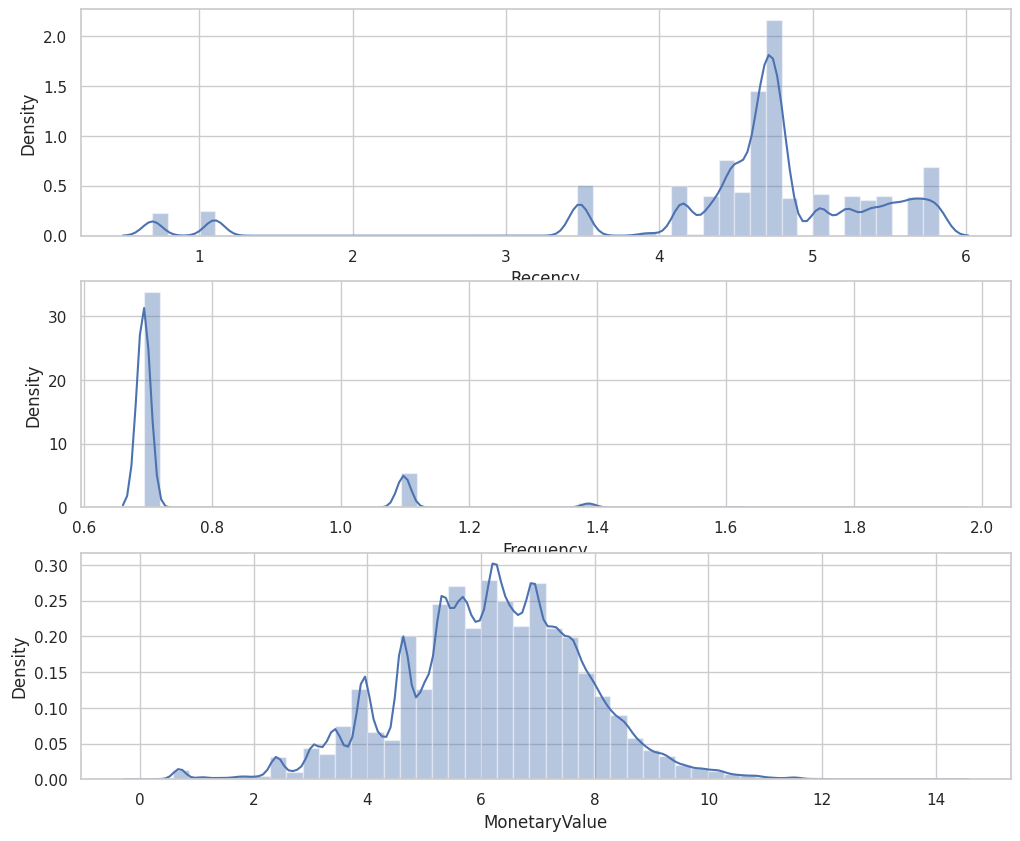

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(customers_fix['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(customers_fix['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(customers_fix['MonetaryValue'])
# Show the plot
plt.show()

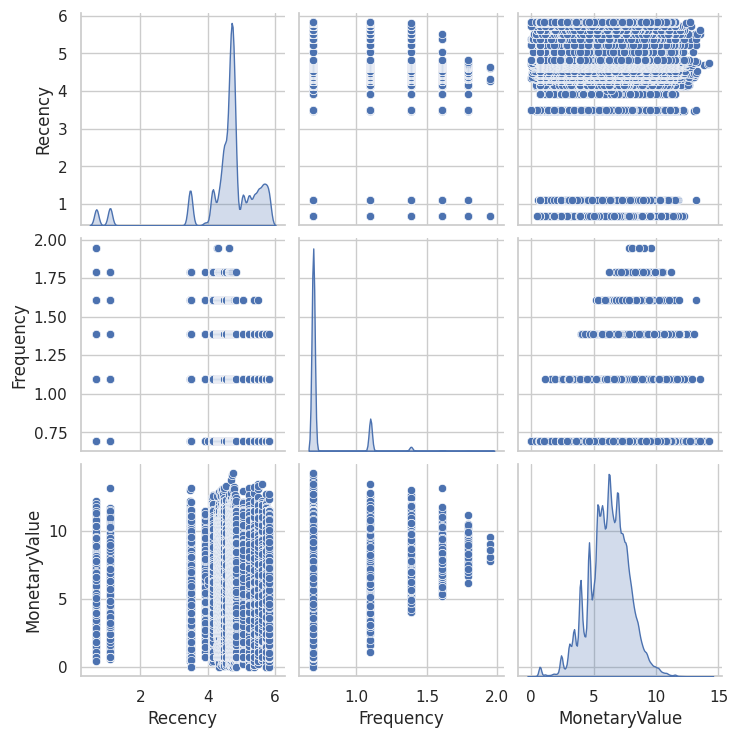

In [ ]:
sns.pairplot(customers_fix, diag_kind='kde')
plt.show()

In [ ]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(customers_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0. -0. -0.]
[1. 1. 1.]


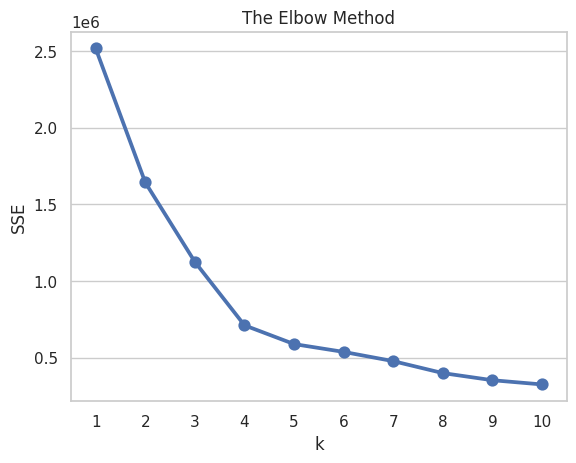

In [ ]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

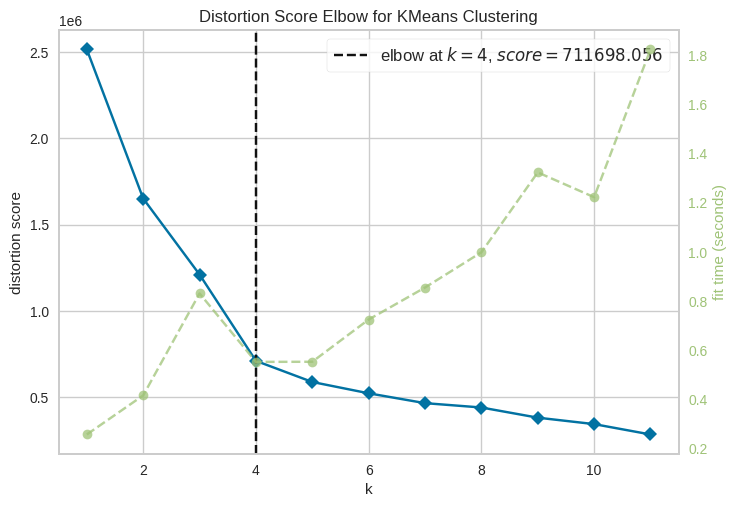

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(customers_normalized)
visualizer.show()

In [ ]:
# Convert the NumPy array back to a DataFrame
customers_normal = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'Monetary'])


,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,118116,118116,118116,118116
1,362661,362661,362661,362661
2,39962,39962,39962,39962
3,317822,317822,317822,317822


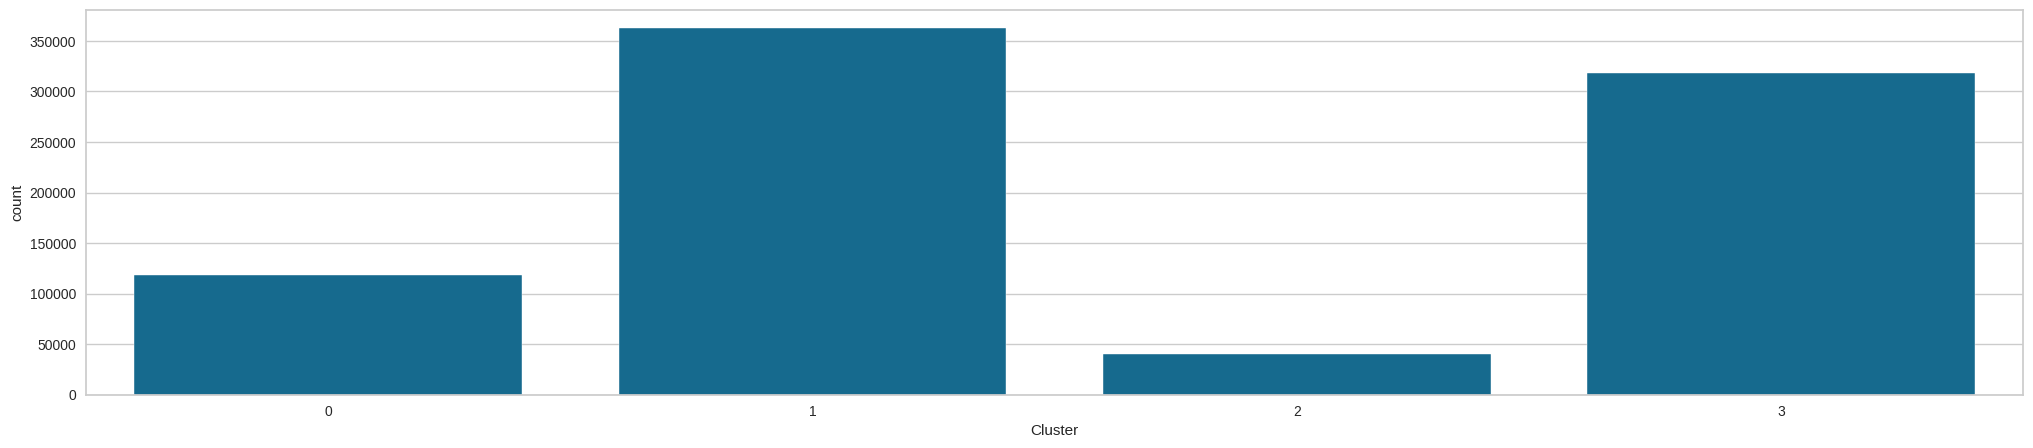

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(customers_normal)
model.labels_.shape
rfm["Cluster"] = model.labels_
rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=rfm)
rfm.groupby(['Cluster']).count()

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster
426127,C5117513,1,2,100.00,2
426114,C5117471,1,1,50.00,2
314451,C4025060,1,2,3200.49,2
87364,C1827729,1,2,2238.98,2
490554,C5726365,1,1,50.00,2
...,...,...,...,...,...
662005,C7388950,337,1,10000.00,1
285759,C3734357,337,1,16.88,3
412434,C4956888,337,1,1440.00,1
838494,C9097870,337,1,100.00,3


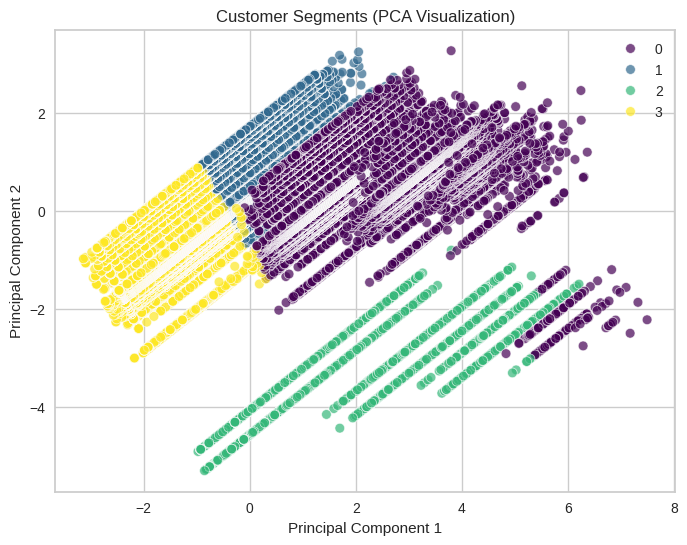

In [ ]:
##Visualizing Clusters
# Reduce dimensions using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(customers_normal)
#Add the first two principal components to the dataframe.
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

#Draw a scatter plot of PCA2 vs PCA1 to visualise the clusters
plt.figure (figsize=(8,6))
sns.scatterplot(x=rfm['PCA1'], y=rfm['PCA2'], hue=rfm[ 'Cluster'], palette='viridis', alpha=0.7)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel( 'Principal Component 1')
plt.ylabel( 'Principal Component 2')
plt.title( 'Customer Segments (PCA Visualization)')
plt.legend ()
plt.show()

,Recency,Frequency,Monetary
Cluster,,,
0,118116,118116,118116
1,362661,362661,362661
2,39962,39962,39962
3,317822,317822,317822


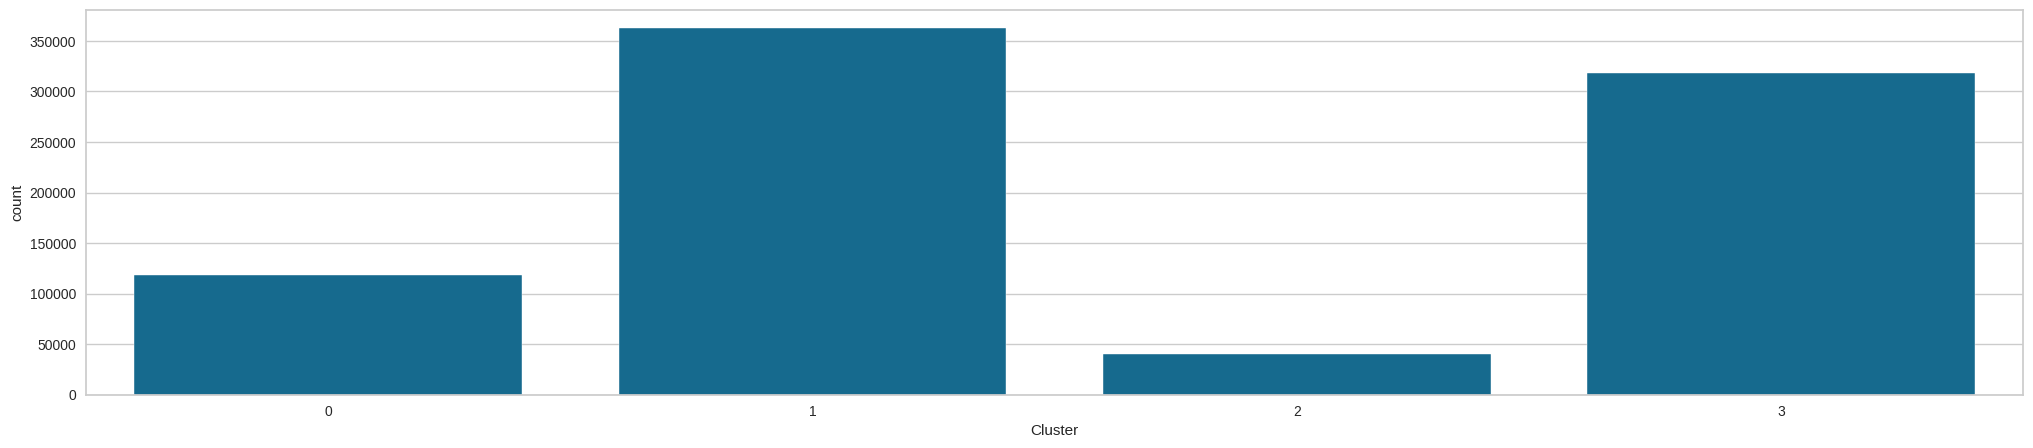

In [ ]:
customers_normal["Cluster"] = model.labels_
customers_normal.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Cluster", data=rfm)
customers_normal.groupby(['Cluster']).count()

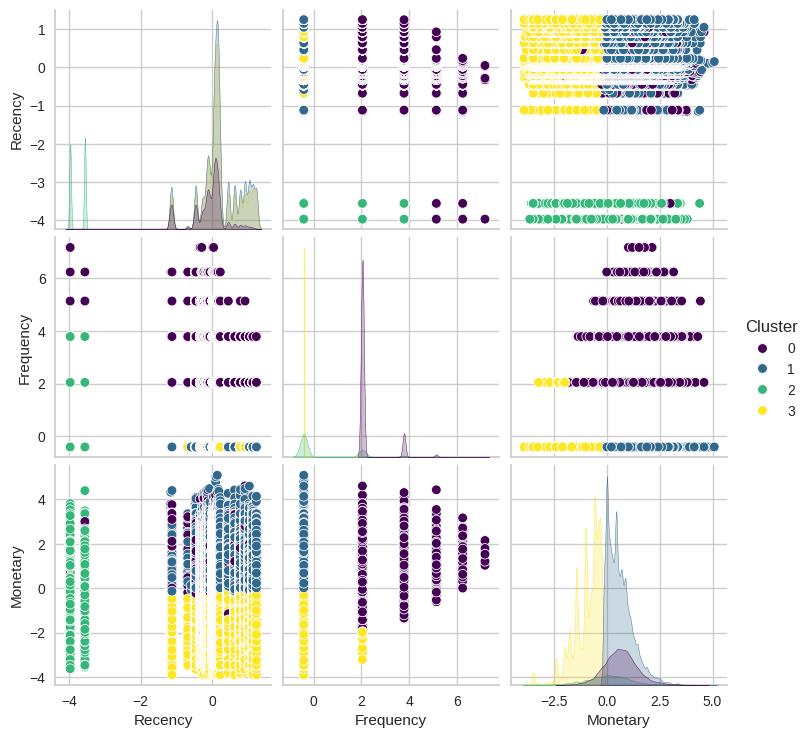

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'rfm' is your DataFrame with 'Recency', 'Frequency', 'Monetary', and 'Cluster' columns

sns.pairplot(customers_normal[['Recency', 'Frequency', 'Monetary', 'Cluster']], hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()

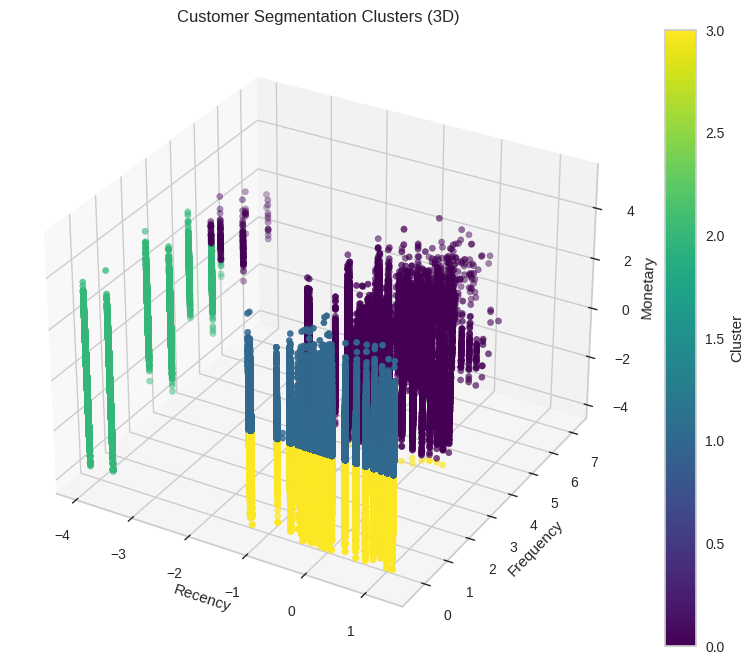

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting


fig = plt.figure(figsize=(10, 8))  # Adjust figure size as needed
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot with color-coded clusters
scatter = ax.scatter(customers_normal['Recency'], customers_normal['Frequency'], customers_normal['Monetary'], c=customers_normal['Cluster'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Customer Segmentation Clusters (3D)')

# Add a colorbar
plt.colorbar(scatter, label='Cluster')

# Show the plot
plt.show()

In [ ]:
cluster_means = customers_normal[['Cluster', 'Recency','Frequency', 'Monetary']].groupby('Cluster',as_index=False).mean()
print(cluster_means)

   Cluster   Recency  Frequency  Monetary
0        0 -0.087627   2.270120  0.646425
1        1  0.241353  -0.412555  0.614188
2        2 -3.759683   0.313250  0.054992
3        3  0.229894  -0.412300 -0.947992
